# NEURALPROPHET MODELS 2


In this notebook, we are going to fit Prophet models by using the dataset with COVID data.

### 📑 Index
* [1. FIRST NEURALPROPHET MODEL](#first_model)
* [2. SECOND NEURALPROPHET MODEL](#second_model)
* [3. ANOTHER MODEL BY ADJUSTING SOME PARAMETERS](#best1)

Import the packages.

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import itertools
import random
import torch
from neuralprophet import NeuralProphet
from pylab import rcParams

import warnings 
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore",category=FutureWarning)

plt.style.use("fivethirtyeight")
plt.rcParams["lines.linewidth"] = 1.5
dark_style = {
    "figure.facecolor": "#212946",
    "axes.facecolor": "#212946",
    "savefig.facecolor": "#212946",
    "axes.grid": True,
    "axes.grid.which": "both",
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.spines.bottom": False,
    "grid.color": "#2A3459",
    "grid.linewidth": "1",
    "text.color": "0.6",
    "axes.labelcolor": "0.6",
    "xtick.color": "0.6",
    "ytick.color": "0.6",
    "font.size": 12,
}
plt.rcParams.update(dark_style)
rcParams['figure.figsize'] = (18, 7)

Load the data and consider that our data set goes from 2003 to 2023 (with COVID). Consider the exogenous variable FLT ( total number of flights) as future regressor and create a new exogenous variable Revenue_Total as lagged regressor.

In [2]:
df = pd.read_csv(
    "C:/Users/Juanfran cd/Desktop/MATEMATICAS UA/TFG/air traffic.csv",
    encoding="ISO-8859-1",
)

# Clean and convert columns to number 
df["Pax"] = df["Pax"].str.replace(",", "", regex=True).astype(float)
df["Flt"] = df["Flt"].str.replace(",", "", regex=True).astype(float)
df["Dom_RPM"] = df["Dom_RPM"].str.replace(",", "", regex=True).astype(float)
df["Int_RPM"] = df["Int_RPM"].str.replace(",", "", regex=True).astype(float)

# Create date column in YYYY-MM format
df["Date"] = pd.to_datetime(
    df["Year"].astype(str) + "-" + df["Month"].astype(str).str.zfill(2), format="%Y-%m"
)

# Create the new column 'Revenue_Total'
df["Revenue_Total"] = df["Dom_RPM"] + df["Int_RPM"]

# Filter data between 2003 and 2019 and select relevant columns
df1 = df.loc[df["Year"].between(2003, 2023), ["Date", "Pax", "Flt", "Revenue_Total"]].copy()

# Rename columns for NeuralProphet
df1 = df1.rename(columns={"Pax": "y", "Date": "ds"})

Split the data set into 2: a training set (from 2003 to 2021, that is 228 values) and a test set (from 2022 to 2023, that is 21 values).

In [3]:
train = df1.loc[df1["ds"] <= "2021-12-01"]
test = df1.loc[df1["ds"] >= "2022-01-01"]

train.shape, test.shape

((228, 4), (21, 4))

Make an error metrics function.

In [4]:
def EVAL_METRICS_FUNC(y_true, y_pred):
    def MAPE(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print("Metric evaluation result:-")
    print(f"MAE: {metrics.mean_absolute_error(y_true, y_pred)}")
    print(f"MAPE: {MAPE(y_true, y_pred)}")

<a id='first_model'></a>
## 1. FIRST NEURALPROPHET MODEL

At first, we make a model with default values.

In [5]:
# Fix seed for reproducibility
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

m = NeuralProphet()

# Train the model
m.fit(train[["ds", "y"]], freq="M")

# Make future dataframe
m_future = m.make_future_dataframe(train[["ds", "y"]], periods=21, n_historic_predictions=True)

# Forecasting
forecast = m.predict(m_future)
forecast[['ds', 'yhat1']]

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.561]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 180


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (15) is too small than the required number                     for the learning rate finder (212). The results might not be optimal.


Finding best initial lr:   0%|          | 0/212 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.561]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.598]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.598]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 21 rows at the end with NaNs in 'y' column.


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,yhat1
0,2003-01-01,45747324.0
1,2003-02-01,43547204.0
2,2003-03-01,54357000.0
3,2003-04-01,52404848.0
4,2003-05-01,55951232.0
...,...,...
244,2023-05-01,47391808.0
245,2023-06-01,50359396.0
246,2023-07-01,53218592.0
247,2023-08-01,50363096.0


Plot of forecasting

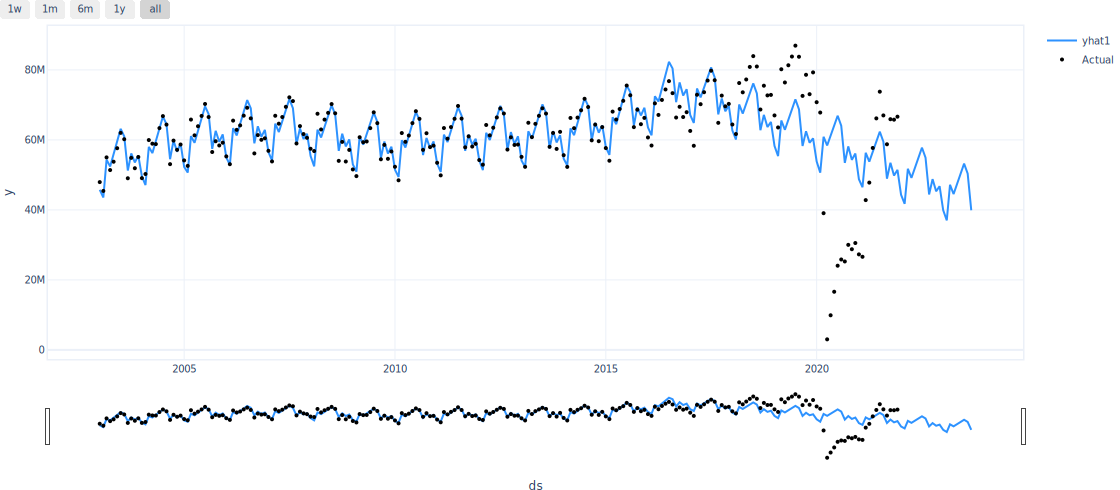

In [6]:
m.set_plotting_backend("plotly-static")
m.plot(forecast, figsize=(16, 7))

From 2003 to 2019, the model fits quite well with actual data. There is a clear seasonality and an increasing trend captured correctly From 2020, the real data fall sharply, the model is not able to anticipate this change and follows a decreasing inertia, but more gentle Therefore, there is a big prediction error in 2020-2021.

Plot of forecasting and components

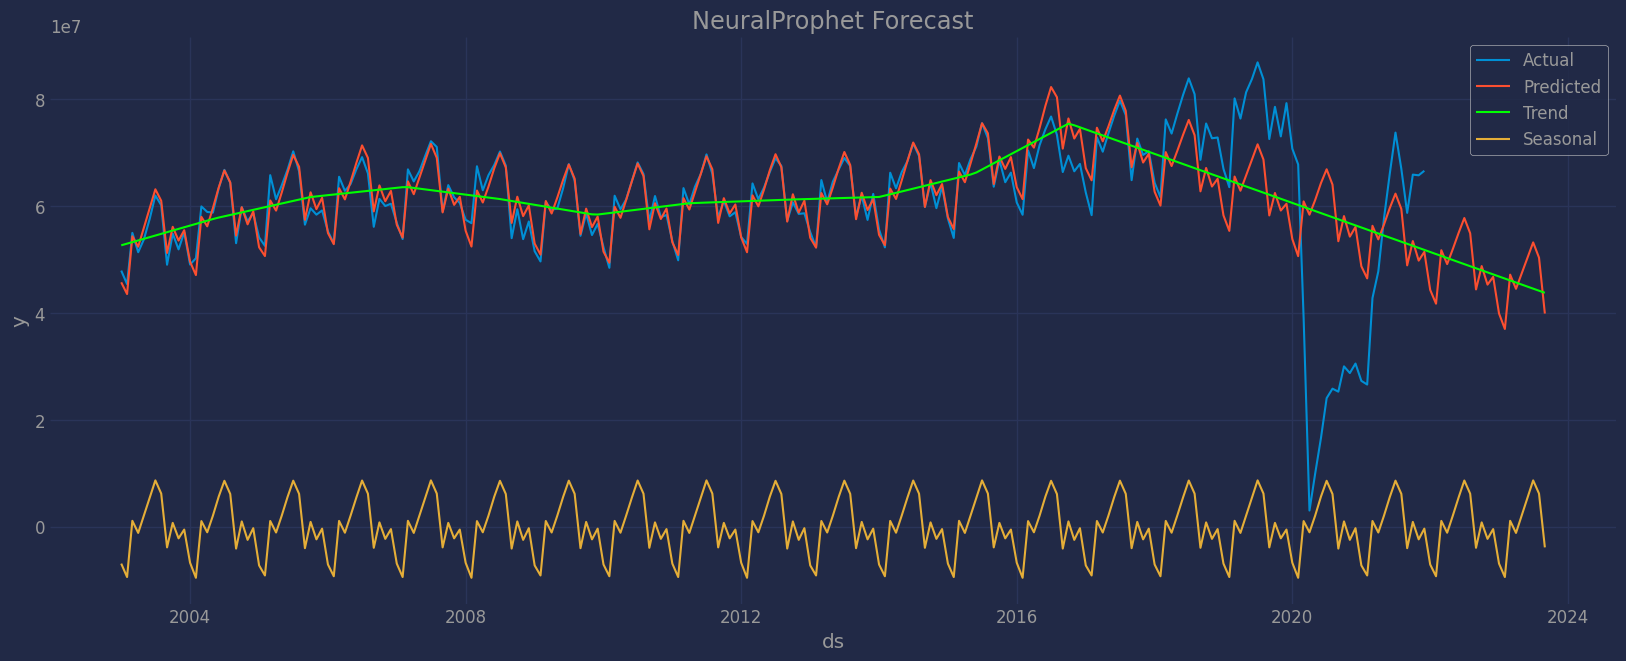

In [7]:
sns.lineplot(data=forecast, x="ds", y="y", label="Actual")
sns.lineplot(data=forecast, x="ds", y="yhat1", label="Predicted")
sns.lineplot(data=forecast, x="ds", y="trend", label="Trend", color="lime")
sns.lineplot(data=forecast, x="ds", y="season_yearly", label="Seasonal")
plt.title("NeuralProphet Forecast")
plt.show()

Plot of internal parameters of the trained model: trend, trend rate change y seasonality (yearly).

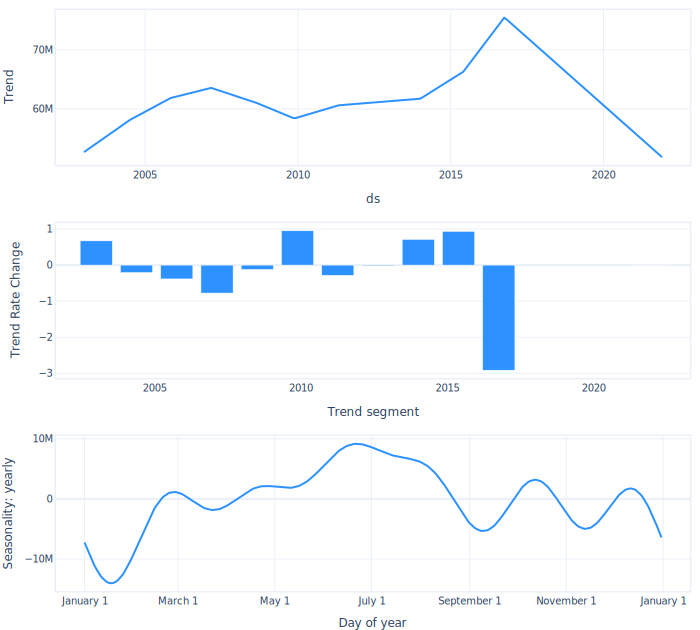

In [8]:
m.plot_parameters()

This graph shows an overview of the internal parameters of the trained model: trend, trend rate change and seasonality (yearly). 

1. Trend: from 2002 to 2008, there is a gradual increase. Between 2008 and 2011, there is a slight decrease (possibly due to the financial crisis). From 2012 to 2017, recovery with very marked growth, reaching a peak around 2017. From 2018-2019, there is a very noticeable drop, which corresponds to the impact of COVID in 2020.

2. Trend Rate Change: around 2008 and 2016, there is high growth (positive bars), while in 2020 there is a sharp downward shift.

3. Seasonality (yearly): there are lowest in January (low passenger numbers) and highest between June and August (summer, high season). In addition, there are mild drops between September and December, with intermittent peaks.

#### Error Metrics

In [9]:
train[["yhat"]] = (
    forecast[["yhat1"]].iloc[:228].values
)
test.loc[:, ["yhat"]] = (
    forecast[["yhat1"]].iloc[-21:].values
)

For train set

In [10]:
y_true = train["y"].values
y_pred = train["yhat"].values
EVAL_METRICS_FUNC(y_true, y_pred)

Metric evaluation result:-
MAE: 4636310.938596491
MAPE: 19.86405134006105


For test set

In [11]:
y_true = test["y"].values
y_pred = test["yhat"].values
EVAL_METRICS_FUNC(y_true, y_pred)

Metric evaluation result:-
MAE: 26356236.666666668
MAPE: 35.09124744465114


Another plot of forecasting

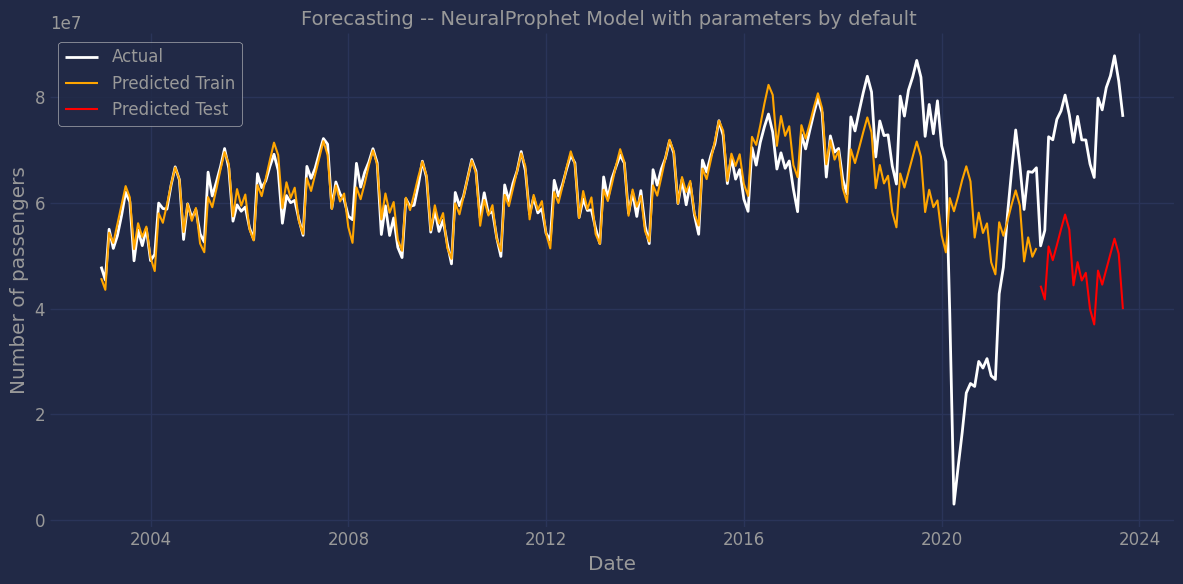

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df1["ds"], df1["y"], label="Actual", color="white", linewidth=2)
plt.plot(train["ds"], train["yhat"], label="Predicted Train", color="orange")
plt.plot(test["ds"], test["yhat"], label="Predicted Test", color="red")
plt.title("Forecasting -- NeuralProphet Model with parameters by default ", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../graphics/Neuralprophet_con_covid/default_con_covid", dpi=300, bbox_inches="tight")
plt.show()

<a id='second_model'></a>
## 2. SECOND NEURALPROPHET MODEL

Firstly, let's adjust the main parameters manually in the model.

#### *Holidays parameters*

1. add_events: to include events such as holidays, unexpected events, etc.
2. add_country_holidays: it automatically adds a country’s holidays.

In [13]:
# Create a DataFrame for events
date_range = pd.date_range(start="2020-01-01", end="2021-09-01", freq="MS")

df_events = pd.DataFrame({
    "event": "covid",
    "ds": date_range
})

In [14]:
# Fix seed for reproducibility
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# Create a model with control over holidays
m_events = NeuralProphet()

# Add events to the model
m_events.add_events("covid")

# Fit the model
df_all = m_events.create_df_with_events(train[["ds", "y"]], df_events)
m_events.fit(df_all, freq="M", epochs=100)

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.561]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (15) is too small than the required number                     for the learning rate finder (212). The results might not be optimal.


Finding best initial lr:   0%|          | 0/212 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.394282,0.0,49889672.00,61055544.0,0.410057,0.0,0
1,0.322462,0.0,40449720.00,52710096.0,0.318172,0.0,1
2,0.263792,0.0,34054520.00,46923132.0,0.260322,0.0,2
3,0.218124,0.0,30063294.00,40935932.0,0.227312,0.0,3
4,0.173926,0.0,26209836.00,34646828.0,0.176836,0.0,4
...,...,...,...,...,...,...,...
95,0.012201,0.0,2902323.50,5901337.0,0.011765,0.0,95
96,0.012188,0.0,2829312.00,5345329.5,0.011609,0.0,96
97,0.012199,0.0,2837056.00,5435595.5,0.011602,0.0,97
98,0.012191,0.0,2837037.25,5536262.5,0.011600,0.0,98


In [15]:
# Make future dataframe
future_events = m_events.make_future_dataframe(df_all[["ds", "y", "covid"]], periods=24, n_historic_predictions=True)

# Forecasting
forecast_events = m_events.predict(future_events)
forecast_events[["ds", "yhat1"]]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.561]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (NP.data.splitting._make_future_dataframe) - Future values not supplied for user specified events. All events being treated as not occurring in future
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.603]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.603]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 24 rows at the end with NaNs in 'y' column.


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,yhat1
0,2003-01-01,46899500.0
1,2003-02-01,44846028.0
2,2003-03-01,55959312.0
3,2003-04-01,52814888.0
4,2003-05-01,56155492.0
...,...,...
247,2023-08-01,90533480.0
248,2023-09-01,80666488.0
249,2023-10-01,83506352.0
250,2023-11-01,79997128.0


#### Error Metrics

In [16]:
train[["yhat_events"]] = (
    forecast_events[["yhat1"]].iloc[:228].values
)
test.loc[:, ["yhat_events"]] = (
    forecast_events[["yhat1"]].iloc[-21:].values
)

For train set

In [17]:
y_true = train["y"].values
y_pred = train["yhat_events"].values
EVAL_METRICS_FUNC(y_true, y_pred)

Metric evaluation result:-
MAE: 2922934.692982456
MAPE: 11.871211254324916


For test set

In [18]:
y_true = test["y"].values
y_pred = test["yhat_events"].values
EVAL_METRICS_FUNC(y_true, y_pred)

Metric evaluation result:-
MAE: 10535401.142857144
MAPE: 15.807483137022329


Plot of forecasting

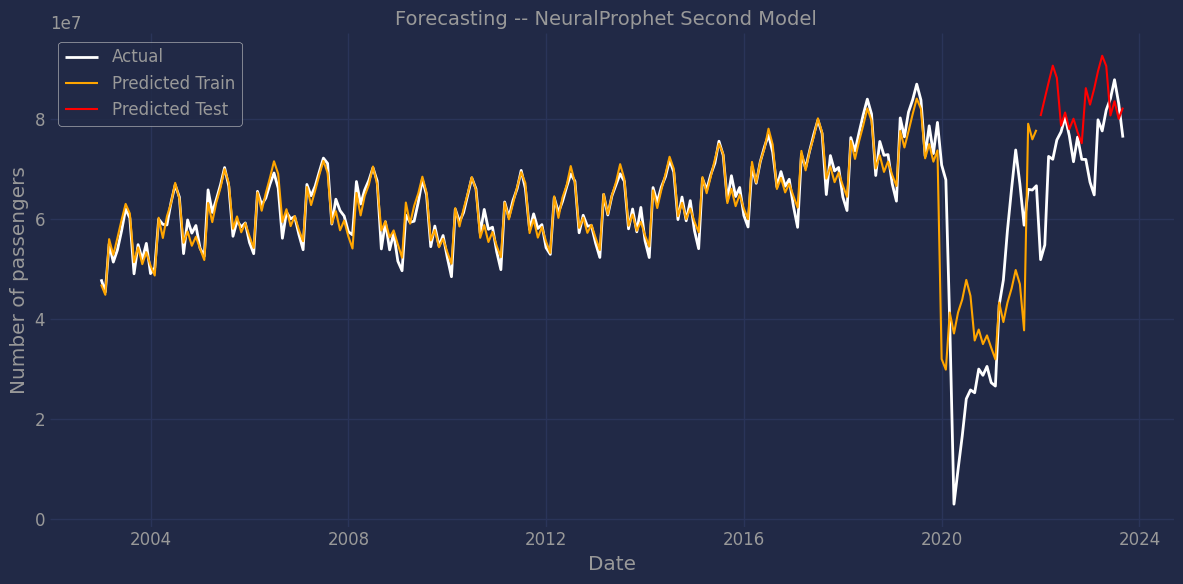

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df1["ds"], df1["y"], label="Actual", color="white", linewidth=2)
plt.plot(train["ds"], train["yhat_events"], label="Predicted Train", color="orange")
plt.plot(test["ds"], test["yhat_events"], label="Predicted Test", color="red")
plt.title("Forecasting -- NeuralProphet Second Model  ", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../graphics/Neuralprophet_con_covid/second_con_covid", dpi=300, bbox_inches="tight")
plt.show()

<a id='best1'></a>
## 3. ANOTHER MODEL BY ADJUSTING SOME PARAMETERS

In [20]:
# Fix seed for reproducibility
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

date_range = pd.date_range(start="2020-01-01", end="2021-09-01", freq="MS")
df_events = pd.DataFrame({
    "event": "covid",
    "ds": date_range
})

m2 = NeuralProphet(
    loss_func="Huber"
)

# Add events and regressors
m2.add_future_regressor(name="Flt")           
m2.add_events(["covid"])


df_train_events = m2.create_df_with_events(train[["ds", "y", "Flt"]], df_events)


# Fit the model
m2.fit(
    df_train_events,
    freq="M",
    epochs=200,
    learning_rate=0.01
)

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.561]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.311266,0.0,4.065509e+07,47706568.00,0.308723,0.0,0
1,0.294336,0.0,3.947206e+07,47316072.00,0.302917,0.0,1
2,0.278608,0.0,3.682855e+07,44829584.00,0.275323,0.0,2
3,0.263796,0.0,3.526862e+07,43372012.00,0.262443,0.0,3
4,0.249610,0.0,3.301276e+07,41045084.00,0.241689,0.0,4
...,...,...,...,...,...,...,...
195,0.001383,0.0,1.479534e+06,2095831.75,0.001476,0.0,195
196,0.001384,0.0,1.433823e+06,2039568.25,0.001330,0.0,196
197,0.001383,0.0,1.407599e+06,1947005.75,0.001320,0.0,197
198,0.001385,0.0,1.466397e+06,2143974.75,0.001426,0.0,198


In [21]:
df_pred_events = m2.create_df_with_events(df1[["ds", "y", "Flt"]], df_events)

# Make future dataframe
future_m2 = m2.make_future_dataframe(
    df=df_pred_events,
    periods=0,  
    n_historic_predictions=True
)

# Forecasting
forecast_m2 = m2.predict(future_m2)
forecast_m2[['ds', 'yhat1']]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.data.splitting._make_future_dataframe) - Not extending df into future as no periods specified. You can skip this and predict directly instead.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.598]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.598]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.598]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,yhat1
0,2003-01-01,49947996.0
1,2003-02-01,42526356.0
2,2003-03-01,54388324.0
3,2003-04-01,50639172.0
4,2003-05-01,54127620.0
...,...,...
244,2023-05-01,80475848.0
245,2023-06-01,82008632.0
246,2023-07-01,84830864.0
247,2023-08-01,82480880.0


#### Error Metrics

In [22]:
train["yhat2"] = forecast_m2["yhat1"].iloc[:len(train)].values
test["yhat2"] = forecast_m2["yhat1"].iloc[-21:].values

For train set

In [23]:
# Errores en entrenamiento
train1_valid = train[~train["yhat2"].isna()].copy()
y_true = train1_valid["y"].values
y_pred = train1_valid["yhat2"].values
EVAL_METRICS_FUNC(y_true, y_pred)

Metric evaluation result:-
MAE: 1448279.1798245613
MAPE: 3.4704203706796934


For test set

In [24]:
# Errores en test
y_true_test = test["y"].values
y_pred_test = test["yhat2"].values
EVAL_METRICS_FUNC(y_true_test, y_pred_test)

Metric evaluation result:-
MAE: 1998827.3333333333
MAPE: 3.120784976277621


Plot of forecasting

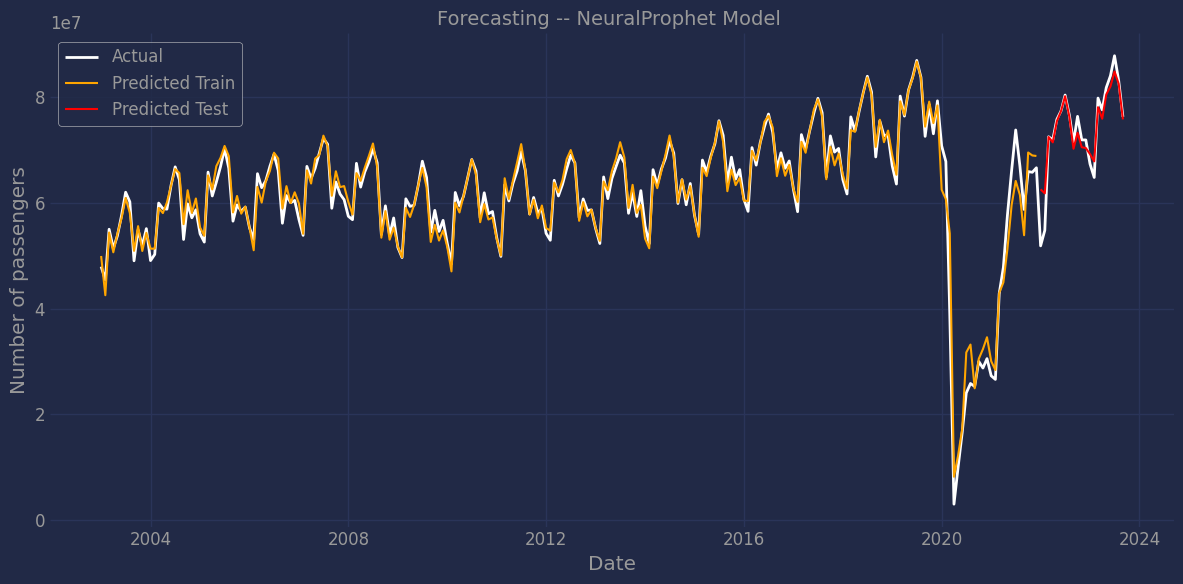

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df1["ds"], df1["y"], label="Actual", color="white", linewidth=2)
plt.plot(train["ds"], train["yhat2"], label="Predicted Train", color="orange")
plt.plot(test["ds"], test["yhat2"], label="Predicted Test", color="red")
plt.title("Forecasting -- NeuralProphet Model ", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../graphics/Neuralprophet_con_covid/best_con_covid", dpi=300, bbox_inches="tight")
plt.show()

Plot of parameters

In [26]:
fig = m2.plot_parameters()
fig.write_image("../graphics/Neuralprophet_con_covid/best_params_con_covid.png", scale=2)
fig.show()

1. Trend: a general upward trend is observed from 2003 to 2022 and growth is particularly marked from 2014 onwards. The model has not reflected a fall in 2020, because probably the actual fall has been captured by the COVID event.

2. Trend Rate Change: although the general trend is increasing, the graph reflects variations in the slope of this trend between time segments. These oscillations indicate areas where the model has detected accelerations or decelerations in the rate of growth, not necessarily absolute decreases in the value of the series.

3. Seasonality (yearly): there are peaks in July (summer) and lows in January and September. A very regular pattern is repeated, consistent with air traffic-related series.

4. Future regressor: this shows the weight learned by the model for the future regression Flt. Such a value close to 1 indicates that the regresor has a very strong and directly proportional impact on the prediction. 

5. Events: this shows the learned effect of the "COVID" event on the time series. An approximate value of -10 million means that each time the "COVID" event occurs, the model subtracts this amount from the predicted value. It is a negative, strong and punctual effect, just what you would expect in a series on passenger traffic where the pandemic caused an immediate collapse.

### Predictions with the best model from October-2023 to December-2024 (15 months)

We get the variable FLT from October-2023 to December-2024 in https://www.transportation.gov/briefing-room/air-travel-consumer-report-october-2024-numbers

In [27]:
# Fix seed for reproducibility
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# Create events dataframe (example: covid pandemic period)
date_covid = pd.date_range(start="2020-01-01", end="2021-09-01", freq="MS")
df_events = pd.DataFrame({
    "event": "covid",
    "ds": date_covid
})

# Create NeuralProphet model
m3 = NeuralProphet(
    loss_func="Huber"
)

# Add lagged regressor and events
m3.add_lagged_regressor("Flt")
m3.add_events(["covid"])

# Merge training data with events
df_train_events = m3.create_df_with_events(df1[["ds", "y", "Flt"]], df_events)

# Fit the model
m3.fit(
    df_train_events,
    freq="M",
    epochs=200,
    learning_rate=0.01
)

INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.598]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_si

Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.512943,0.0,63213100.00,76045080.00,0.513461,0.0,0
1,0.477731,0.0,59576496.00,72510744.00,0.475641,0.0,1
2,0.442799,0.0,55822504.00,68263816.00,0.436741,0.0,2
3,0.407674,0.0,52687384.00,65449412.00,0.406561,0.0,3
4,0.373342,0.0,49382672.00,62761096.00,0.378488,0.0,4
...,...,...,...,...,...,...,...
195,0.005706,0.0,2276206.00,4169384.75,0.005558,0.0,195
196,0.005702,0.0,2257324.00,4092203.00,0.005534,0.0,196
197,0.005701,0.0,2278467.00,3837248.00,0.005562,0.0,197
198,0.005701,0.0,2308425.00,4173678.25,0.005667,0.0,198


In [28]:
df2 = df1.copy()

flights = {
    "2023-10": 723349,
    "2023-11": 701793,
    "2023-12": 717365,
    "2024-01": 707979,
    "2024-02": 685842,
    "2024-03": 740123,
    "2024-04": 728456,
    "2024-05": 750789,
    "2024-06": 762345,
    "2024-07": 779234,
    "2024-08": 765890,
    "2024-09": 707979,
    "2024-10": 739969,
    "2024-11": 701793,
    "2024-12": 717365
}


# Remove 'Revenue_Total' column
df2 = df2.drop(columns=['Revenue_Total'])

# Create future dates
dates_future = pd.date_range(start="2023-10-01", end="2024-12-01", freq="MS")

# Create dataframe for future dates
future_df = pd.DataFrame({
    'ds': dates_future,
    'y': 0,
    'Flt': dates_future.strftime('%Y-%m').map(flights)
})

# Concatenate old df2 with future_df
df2_extended = pd.concat([df2, future_df], ignore_index=True)

In [29]:
df_pred_events = m2.create_df_with_events(df2_extended[["ds", "y", "Flt"]], df_events)

# Make future dataframe
future_m3 = m3.make_future_dataframe(
    df=df_pred_events,
    periods=0,  
    n_historic_predictions=True
)

# Forecasting
forecast_m3 = m3.predict(future_m3)
forecast_m3[['ds', 'yhat1']]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.data.splitting._make_future_dataframe) - Not extending df into future as no periods specified. You can skip this and predict directly instead.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.621]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.621]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.621]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,yhat1
0,2003-01-01,NaN
1,2003-02-01,46578244.0
2,2003-03-01,55280168.0
3,2003-04-01,52880520.0
4,2003-05-01,56069988.0
...,...,...
259,2024-08-01,83724072.0
260,2024-09-01,74055216.0
261,2024-10-01,78789320.0
262,2024-11-01,75470664.0


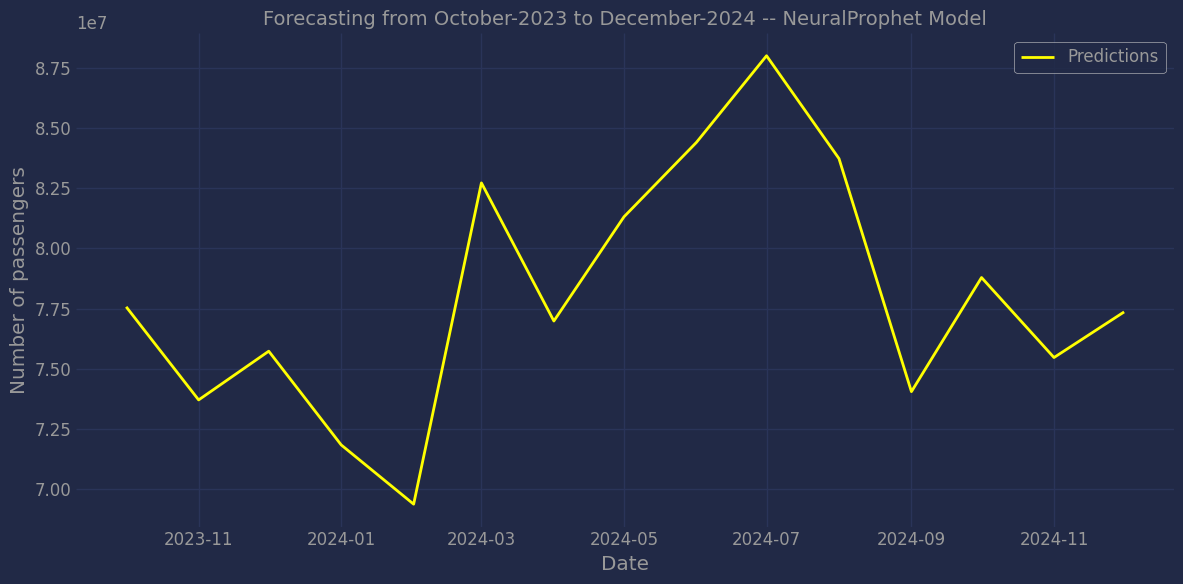

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(
    forecast_m3["ds"].tail(15), 
    forecast_m3["yhat1"].tail(15), 
    label="Predictions", 
    color="yellow", 
    linewidth=2
)
plt.title("Forecasting from October-2023 to December-2024 -- NeuralProphet Model", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../graphics/Neuralprophet_con_covid/final_pred_neuralprophet", dpi=300, bbox_inches="tight")
plt.show()